# Readability and Style Analysis
This notebook compares emails from Katrina Armstrong and Minouche Shafik by calculating text readability and writing style metrics using the Flesch-Kincaid Grade Level and average sentence/word lengths.

In [79]:
import pandas as pd

# Load data
df_katrina = pd.read_excel("Katrina.xlsx")
df_minouche = pd.read_excel("Minouche.xlsx")

# Preview
#df_katrina.head(), df_minouche.head()

In [80]:
import textstat

# Drop missing values and convert to list
katrina_texts = df_katrina['Content'].dropna().tolist()
minouche_texts = df_minouche['Content'].dropna().tolist()

# Function to compute readability stats
def compute_stats(texts):
    return {
        "Grade Level": sum(textstat.flesch_kincaid_grade(text) for text in texts) / len(texts),
        "Reading Ease": sum(textstat.flesch_reading_ease(text) for text in texts) / len(texts),
        "Avg Sentence Length": sum(textstat.avg_sentence_length(text) for text in texts) / len(texts),
        "Avg Syllables per Word": sum(textstat.avg_syllables_per_word(text) for text in texts) / len(texts),
        #"avg_letter_per_word": sum(textstat.avg_letter_per_word(text) for text in texts) / len(texts)
    }

# (Flesch) Plain Text stats
plain_english = {
    "Grade Level": 7,
    "Reading Ease": 60,  
    "Avg Sentence Length": 20,
    "Avg Syllables per Word": 1.5,
    #"avg_letter_per_word": 
}

# Calculate stats
katrina_stats = compute_stats(katrina_texts)
minouche_stats = compute_stats(minouche_texts)

# Combine results
readability_df = pd.DataFrame([katrina_stats, minouche_stats, plain_english], index=["Armstrong", "Shafik", "Plain English"])
readability_df

,Grade Level,Reading Ease,Avg Sentence Length,Avg Syllables per Word
Armstrong,14.792857,32.468214,24.439286,1.767857
Shafik,13.864706,36.660000,23.023529,1.735294
Plain English,7.000000,60.000000,20.000000,1.500000


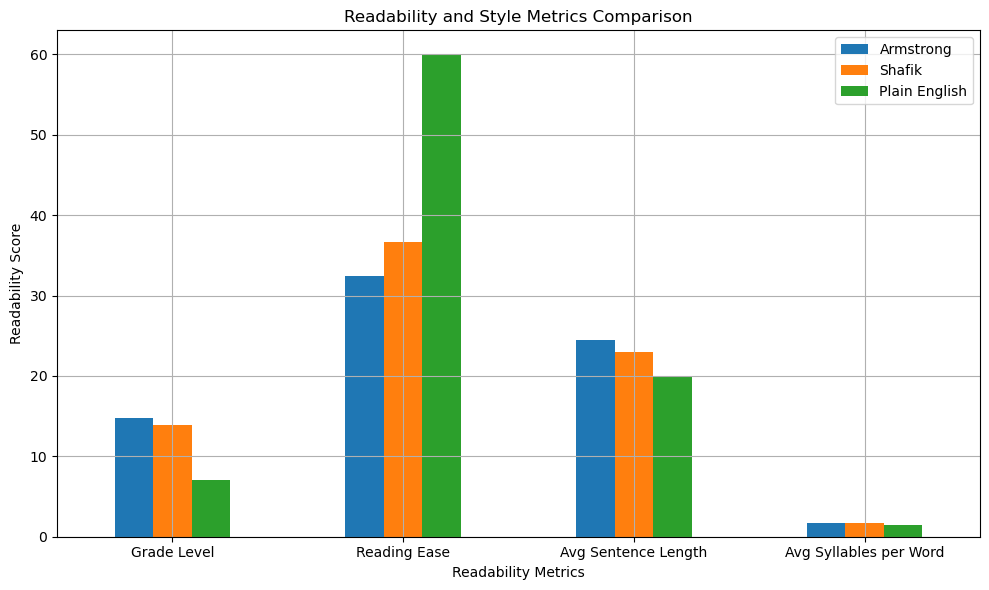

In [ ]:
import matplotlib.pyplot as plt

# Apply wrapped labels
readability_df.T.plot(kind='bar', figsize=(10, 6))
plt.title("Readability and Style Metrics Comparison")
plt.ylabel("Readability Score")
plt.xticks(rotation=0, ha='center')
plt.xlabel("Readability Metrics")
plt.grid(True)
plt.tight_layout()
plt.show()

# Running Flesch-Kincaid test on my own piece

In [82]:
# Read file
with open("Uni_president_piece.sty", "r", encoding="utf-8") as f:
    text = f.read()

# Compute readability statistics using the same method
readability_stats = {
    "Grade Level": textstat.flesch_kincaid_grade(text),
    "Reading Ease": textstat.flesch_reading_ease(text),
    "Avg Sentence Length": textstat.avg_sentence_length(text),
    "Avg Syllables per Word": textstat.avg_syllables_per_word(text),
    #"avg_letter_per_word": textstat.avg_letter_per_word(text)
}

# Display as a DataFrame
my_readability = pd.DataFrame([readability_stats], index=["Emma"])
my_readability


,Grade Level,Reading Ease,Avg Sentence Length,Avg Syllables per Word
Emma,12.0,43.32,19.4,1.7


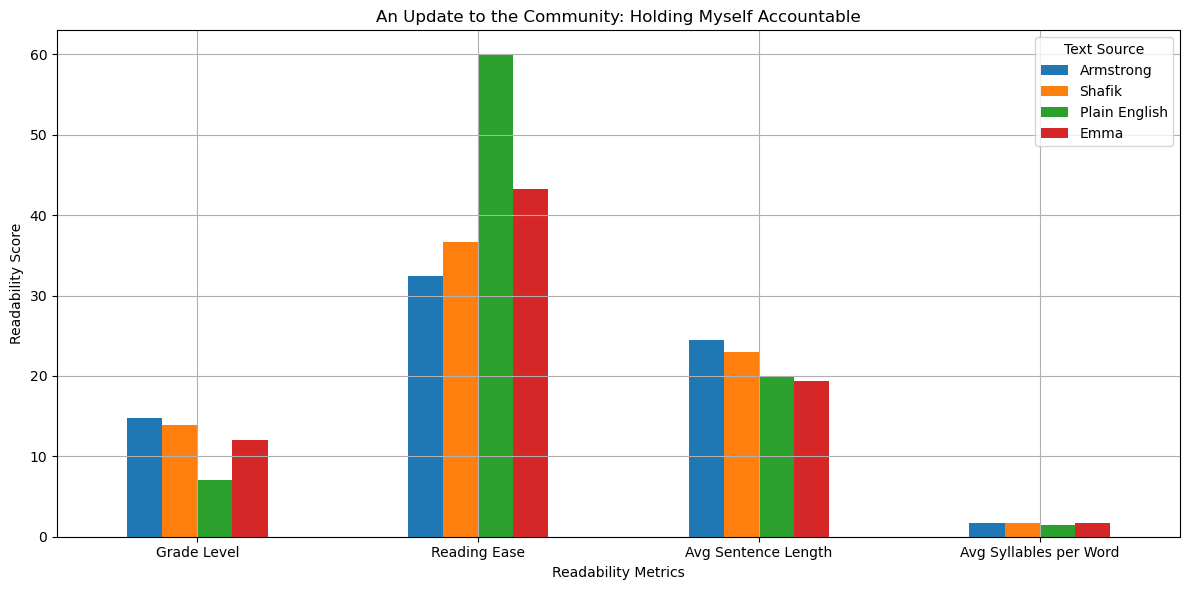

In [ ]:
# Combine all readability data into a single DataFrame
combined_df = pd.concat([readability_df, my_readability])
combined_df.head()

# Plot all three on the same graph
combined_df.T.plot(kind='bar', figsize=(12, 6))
plt.title("An Update to the Community: Holding Myself Accountable")
plt.ylabel("Readability Score")
plt.xticks(rotation=0, ha='center')
plt.xlabel("Readability Metrics")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Text Source")
plt.show()


In [84]:
# Display combined DataFrame
combined_df

,Grade Level,Reading Ease,Avg Sentence Length,Avg Syllables per Word
Armstrong,14.792857,32.468214,24.439286,1.767857
Shafik,13.864706,36.660000,23.023529,1.735294
Plain English,7.000000,60.000000,20.000000,1.500000
Emma,12.000000,43.320000,19.400000,1.700000
